# Assignment Aleksandra Koerkemeier

### My public GitHub repository

This is my public GitHub repository

## 1. Environment preparation

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Set the plotting options
sns.set(rc = {'figure.figsize':(15,10)})

#Format numbers to be more readable
pd.options.display.float_format = '{:,.0f}'.format

## 2. Importing and merging files

As first step I have decided to import the two CSV files provided by the UK goverment, check for common columns and combine the two sets to get an inital feeling of the data.

In [2]:
# Import CSV files
cov = pd.read_csv('covid_19_uk_cases.csv')
vac = pd.read_csv('covid_19_uk_vaccinated.csv')

In [3]:
cov.columns
cov.dtypes

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object

In [4]:
vac.columns
vac.dtypes

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object

In [5]:
#Chang int64 data types into float64
vac=vac.astype({'Vaccinated':'float64', 'First Dose':'float64', 'Second Dose':'float64'})

In [6]:
#Merge two CVS files
covid = cov.merge(right = vac, how = 'left', on = ['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name','Intermediate Region Code', 'Date'])

In [7]:
# Check if the merge was succesful
covid.head()

Province/State  Country/Region  Lat  Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom   18   -63                      AIA   
1       Anguilla  United Kingdom   18   -63                      AIA   
2       Anguilla  United Kingdom   18   -63                      AIA   
3       Anguilla  United Kingdom   18   -63                      AIA   
4       Anguilla  United Kingdom   18   -63                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Deaths  Cases  Recovered  Hospitalised  Vaccinated  First Dose  Second Dose  
0       0      0          0             0           0           0            0  
1       0      0          0             0           0           0            0  
2       0      0          0             0           0           0            0  
3       0      0          0             0           0           0            0  
4       0      0          0             0           0           0            0

## 3. Geographical values
Data at hand has some geographical values and the data dictionary only provides us with an explanation of each column's name:
- Province/State: The state or province, for example, Bermuda and Gibraltar. 
- Country/Region: The country, for example, United Kingdom. 
- Lat: The latitude (location) coordinates of the Province/State. 
- Long: The longitude (location) coordinates of the Province/State. 
- ISO 3166-1 Alpha 3-Codes: The three-letter country abbreviation as defined in the ISO 3166 standard published to represent countries, for example, BMU for Bermuda and GIB for Gibraltar.

As next step I will check which countires' data will be analysed.

In [8]:
# Check which countries are part of the data set
covid_countries = covid.drop_duplicates(subset = ['Province/State'])
covid_countries

Province/State  Country/Region  Lat  Long  \
0                                         Anguilla  United Kingdom   18   -63   
632                                        Bermuda  United Kingdom   32   -65   
1264                        British Virgin Islands  United Kingdom   18   -65   
1896                                Cayman Islands  United Kingdom   19   -81   
2528                               Channel Islands  United Kingdom   49    -2   
3160                   Falkland Islands (Malvinas)  United Kingdom  -52   -60   
3792                                     Gibraltar  United Kingdom   36    -5   
4424                                   Isle of Man  United Kingdom   54    -5   
5056                                    Montserrat  United Kingdom   17   -62   
5688  Saint Helena, Ascension and Tristan da Cunha  United Kingdom   -8   -14   
6320                      Turks and Caicos Islands  United Kingdom   22   -72   
6952                                        Others  United Kingdom   55    -3   

     ISO 3166-1 Alpha 3-Codes                  Sub-region Name  \
0                         AIA  Latin America and the Caribbean   
632                       BMU                 Northern America   
1264                      VGB  Latin America and the Caribbean   
1896                      CYM  Latin America and the Caribbean   
2528                   Others                  Northern Europe   
3160                      FLK  Latin America and the Caribbean   
3792                      GIB                  Southern Europe   
4424                      IMN                  Northern Europe   
5056                      MSR  Latin America and the Caribbean   
5688                      GBR                  Northern Europe   
6320                      TCA  Latin America and the Caribbean   
6952                      GBR                  Northern Europe   

      Intermediate Region Code        Date  Deaths  Cases  Recovered  \
0                           29  2020-01-22       0      0          0   
632                          0  2020-01-22       0      0          0   
1264                        29  2020-01-22       0      0          0   
1896                        29  2020-01-22       0      0          0   
2528                         0  2020-01-22       0      0          0   
3160                         5  2020-01-22       0      0          0   
3792                         0  2020-01-22       0      0          0   
4424                         0  2020-01-22       0      0          0   
5056                        29  2020-01-22       0      0          0   
5688                         0  2020-01-22       0      0          0   
6320                        29  2020-01-22       0      0          0   
6952                         0  2020-01-22       0      0          0   

      Hospitalised  Vaccinated  First Dose  Second Dose  
0                0           0           0            0  
632              0           0           0            0  
1264             0           0           0            0  
1896             0           0           0            0  
2528             0           0           0            0  
3160             0           0           0            0  
3792             0           0           0            0  
4424             0           0           0            0  
5056             0           0           0            0  
5688             0           0           0            0  
6320             0           0           0            0  
6952             0           0           0            0

Quick [Google reaserch](https://www.geodatos.net/en/coordinates/united-kingdom) of the latitude and the longitude (decimal coordinates: 55.378051, -3.435973) of a 'State/Province' *Others* shows that it is United Kingdom.

# 4. Initial Analysis

Now that I know that I will be analysing COVID-19 deaths, cases, recovered, hospitalised, vaccinated (with first dose and second dose) for the UK and Crown Dependencies, I would like to get a statistical feeling of the data.

In [9]:
#Look at sum values for each column
covid.groupby('Province/State')[['Cases', 'Hospitalised', 'Recovered', 'Deaths', 'Vaccinated', 'First Dose',
       'Second Dose']] \
.agg(['sum'])

Cases Hospitalised  \
                                                       sum          sum   
Province/State                                                            
Anguilla                                            35,315      545,540   
Bermuda                                            685,442      311,547   
British Virgin Islands                             284,961      571,506   
Cayman Islands                                     217,756      389,669   
Channel Islands                                  1,957,978      363,690   
Falkland Islands (Malvinas)                         20,482      415,650   
Gibraltar                                        1,413,853      649,459   
Isle of Man                                        887,133      467,605   
Montserrat                                           9,556      597,486   
Others                                       1,621,650,674      285,768   
Saint Helena, Ascension and Tristan da Cunha         1,438      259,773   
Turks and Caicos Islands                           752,618      337,710   

                                             Recovered     Deaths Vaccinated  \
                                                   sum        sum        sum   
Province/State                                                                 
Anguilla                                        12,708         24  4,709,072   
Bermuda                                        363,999     10,353  2,690,908   
British Virgin Islands                          64,359      3,573  4,933,315   
Cayman Islands                                 152,052        911  3,363,624   
Channel Islands                              1,027,626     37,130  3,139,385   
Falkland Islands (Malvinas)                     14,754          0  3,587,869   
Gibraltar                                      956,103     25,412  5,606,041   
Isle of Man                                    328,319     15,051  4,036,345   
Montserrat                                       6,376        539  5,157,560   
Others                                           4,115 46,987,145  2,466,669   
Saint Helena, Ascension and Tristan da Cunha     1,135          4  2,242,421   
Turks and Caicos Islands                       515,923      5,612  2,915,136   

                                             First Dose Second Dose  
                                                    sum         sum  
Province/State                                                       
Anguilla                                      4,931,470   4,709,072  
Bermuda                                       2,817,981   2,690,908  
British Virgin Islands                        5,166,303   4,933,315  
Cayman Islands                                3,522,476   3,363,624  
Channel Islands                               3,287,646   3,139,385  
Falkland Islands (Malvinas)                   3,757,307   3,587,869  
Gibraltar                                     5,870,786   5,606,041  
Isle of Man                                   4,226,984   4,036,345  
Montserrat                                    5,401,128   5,157,560  
Others                                        2,583,151   2,466,669  
Saint Helena, Ascension and Tristan da Cunha  2,348,310   2,242,421  
Turks and Caicos Islands                      3,052,822   2,915,136

## Initial observations

- Data seems to not be reliable as in some provinces there are less COVID-19 cases that hospitalisations (for example 35,315 cases versus 545,540 hospitalisations in Anguilla). 
- Columns 'Vaccinated' and 'Second Dose' seem to both contain the same value of fully vaccinated population.
- Population numbers are missing, so it is hard to sense check the data and also calculate how many people were not vaccinated at all.

## 5. Checking for outliers

[Text(0, 0, 'Anguilla'),
 Text(1, 0, 'Bermuda'),
 Text(2, 0, 'British Virgin Islands'),
 Text(3, 0, 'Cayman Islands'),
 Text(4, 0, 'Channel Islands'),
 Text(5, 0, 'Falkland Islands (Malvinas)'),
 Text(6, 0, 'Gibraltar'),
 Text(7, 0, 'Isle of Man'),
 Text(8, 0, 'Montserrat'),
 Text(9, 0, 'Saint Helena, Ascension and Tristan da Cunha'),
 Text(10, 0, 'Turks and Caicos Islands'),
 Text(11, 0, 'Others')]

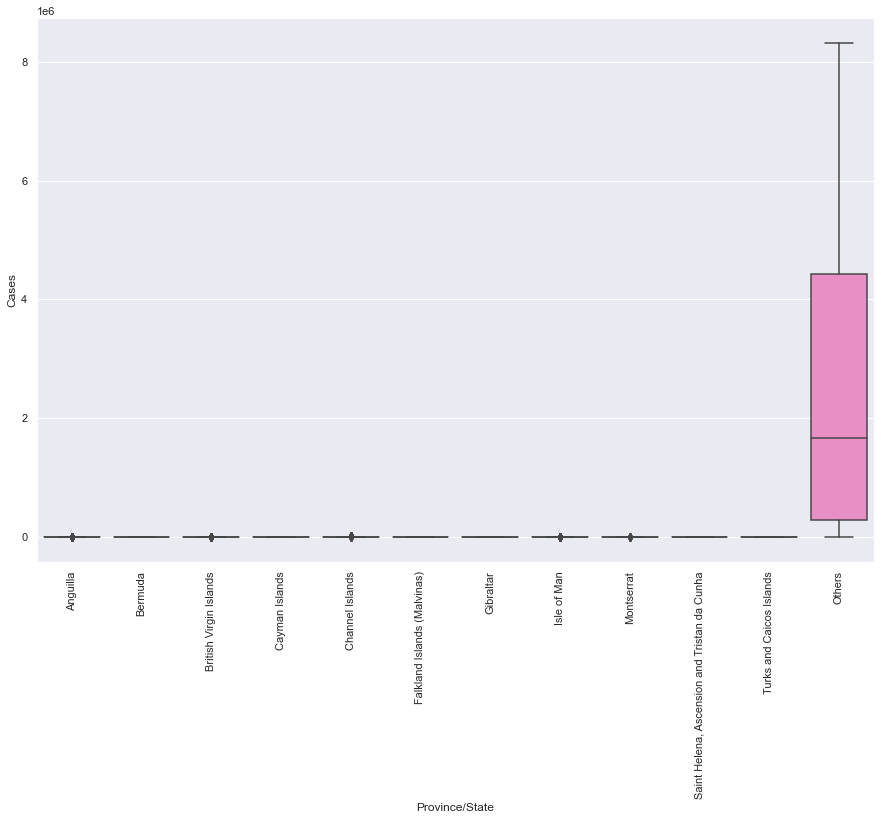

In [10]:
#Create a boxplot for cases
chart=sns.boxplot(x='Province/State', y='Cases',
            data=covid)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Anguilla'),
 Text(1, 0, 'Bermuda'),
 Text(2, 0, 'British Virgin Islands'),
 Text(3, 0, 'Cayman Islands'),
 Text(4, 0, 'Channel Islands'),
 Text(5, 0, 'Falkland Islands (Malvinas)'),
 Text(6, 0, 'Gibraltar'),
 Text(7, 0, 'Isle of Man'),
 Text(8, 0, 'Montserrat'),
 Text(9, 0, 'Saint Helena, Ascension and Tristan da Cunha'),
 Text(10, 0, 'Turks and Caicos Islands'),
 Text(11, 0, 'Others')]

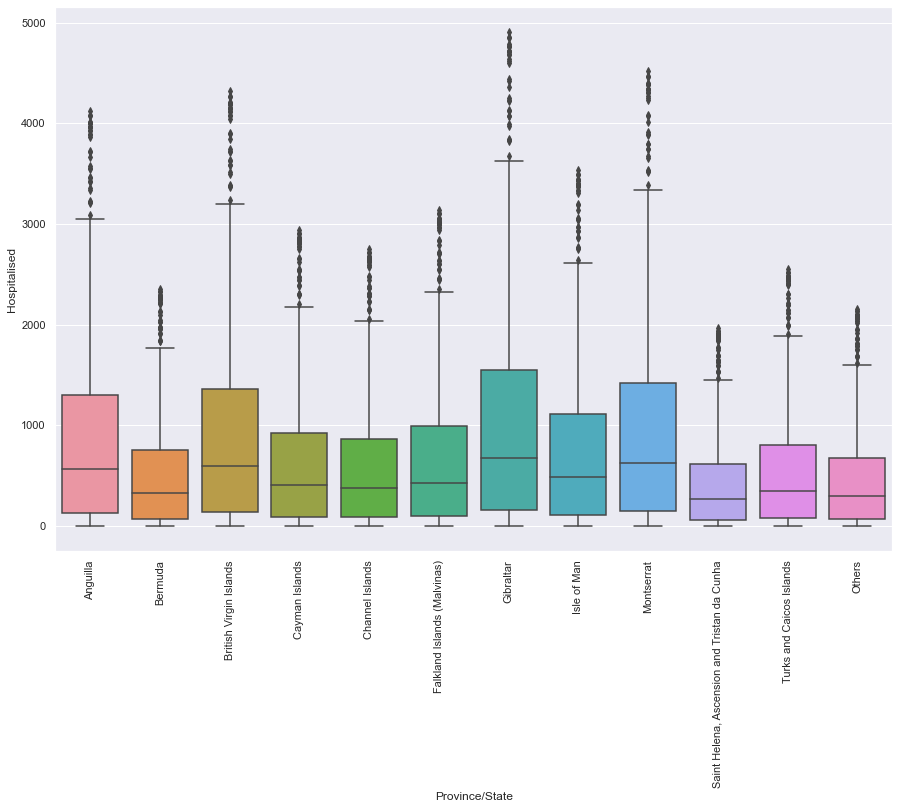

In [11]:
#Create a boxplot for hospitalisations
chart=sns.boxplot(x='Province/State', y='Hospitalised',
            data=covid)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Anguilla'),
 Text(1, 0, 'Bermuda'),
 Text(2, 0, 'British Virgin Islands'),
 Text(3, 0, 'Cayman Islands'),
 Text(4, 0, 'Channel Islands'),
 Text(5, 0, 'Falkland Islands (Malvinas)'),
 Text(6, 0, 'Gibraltar'),
 Text(7, 0, 'Isle of Man'),
 Text(8, 0, 'Montserrat'),
 Text(9, 0, 'Saint Helena, Ascension and Tristan da Cunha'),
 Text(10, 0, 'Turks and Caicos Islands'),
 Text(11, 0, 'Others')]

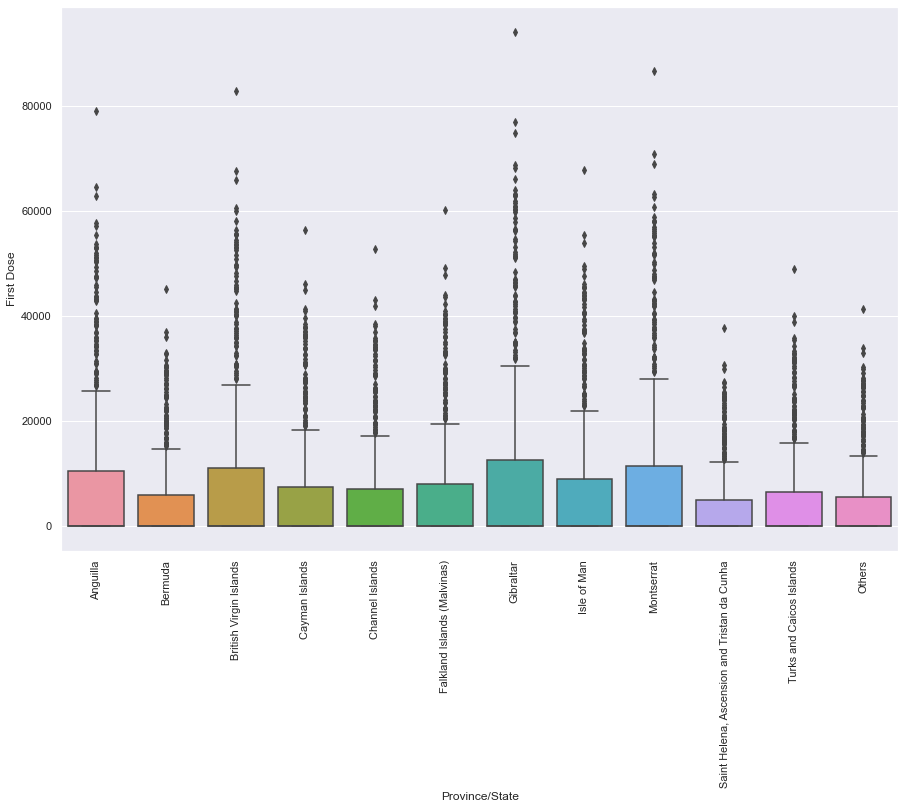

In [12]:
#Create a boxplot for First Dose
chart=sns.boxplot(x='Province/State', y='First Dose',
            data=covid)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Anguilla'),
 Text(1, 0, 'Bermuda'),
 Text(2, 0, 'British Virgin Islands'),
 Text(3, 0, 'Cayman Islands'),
 Text(4, 0, 'Channel Islands'),
 Text(5, 0, 'Falkland Islands (Malvinas)'),
 Text(6, 0, 'Gibraltar'),
 Text(7, 0, 'Isle of Man'),
 Text(8, 0, 'Montserrat'),
 Text(9, 0, 'Saint Helena, Ascension and Tristan da Cunha'),
 Text(10, 0, 'Turks and Caicos Islands'),
 Text(11, 0, 'Others')]

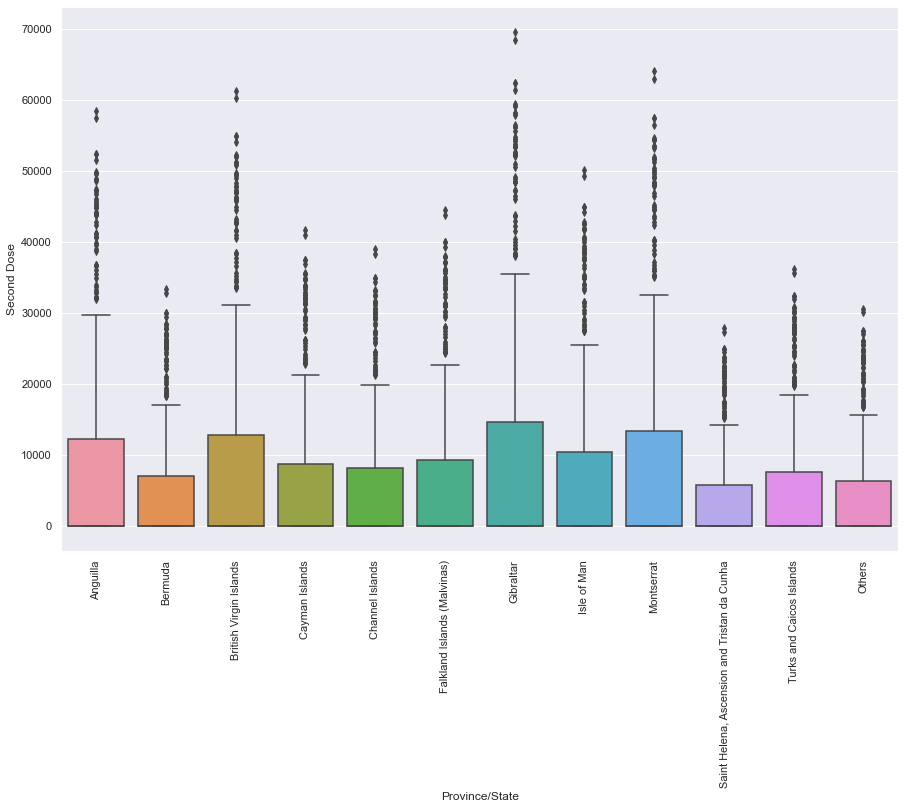

In [13]:
#Create a boxplot for Second Dose
chart=sns.boxplot(x='Province/State', y='Second Dose',
            data=covid)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

## Outliers analysis observations

Initail observation is confirmed beyond doubt - data has a lot of outliers. 

Looking at boxplots for example for the UK (Others) we can clearly observe that the amount of COVID-19 cases (1,621,650,674) is disproportionately bigger than the numbers of hospitalised (285,768) and vaccinated (with both first - 2,583,151 and second dose - 2,466,669) population. There are 68 milion + people living in the UK so all of the numbers seem either inflated or deflated, depending on the case.

# 6. Excel sense check

Let's search for a root cause of the data set being skewed by a quick sense check in Excel.


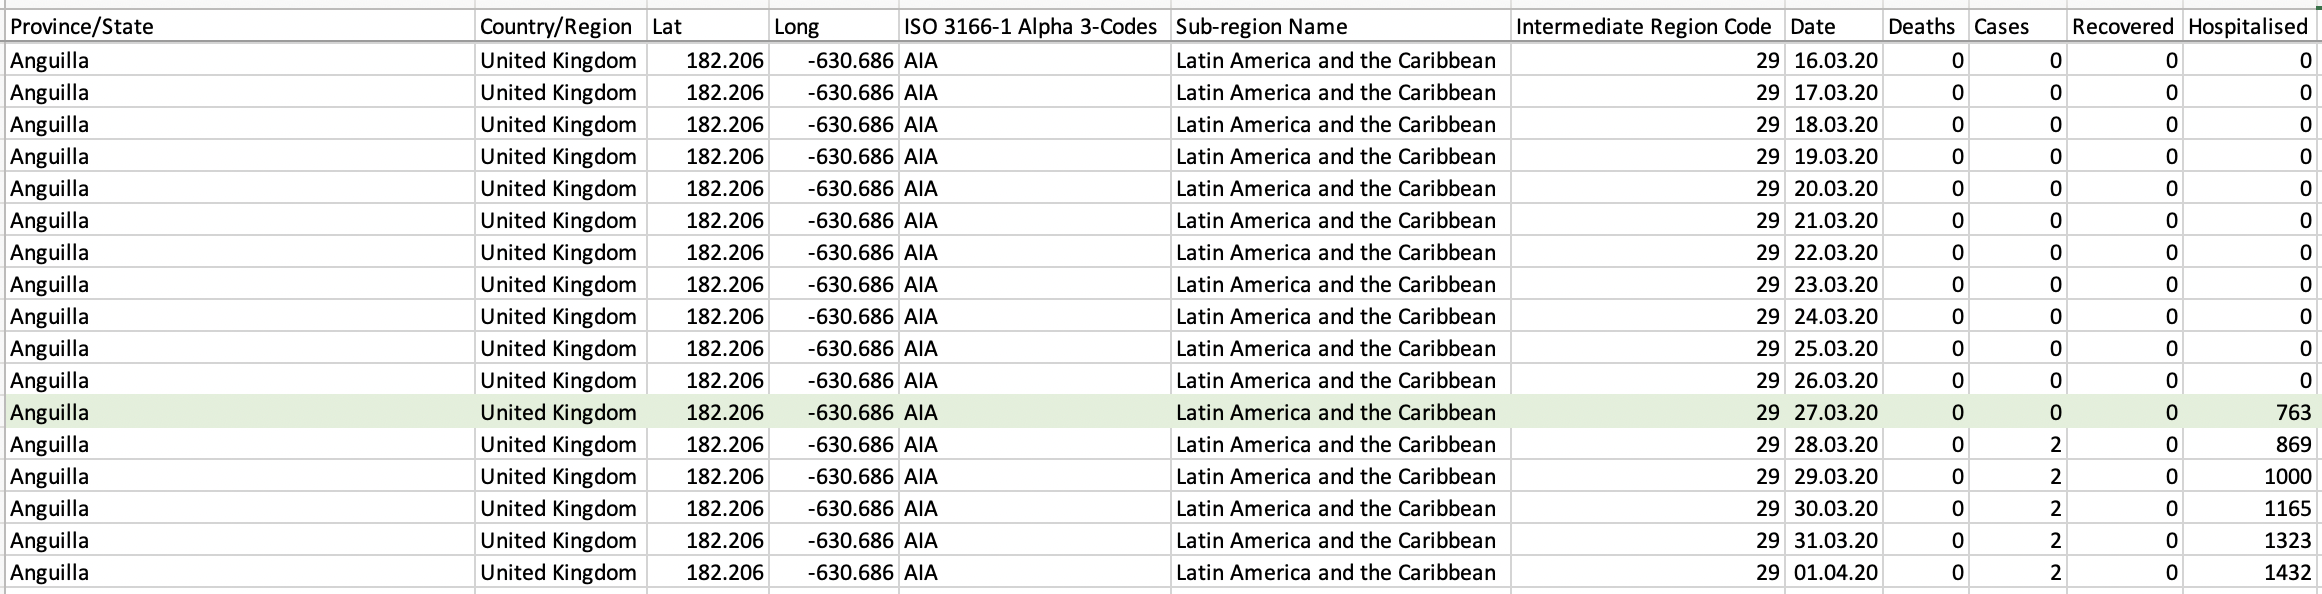

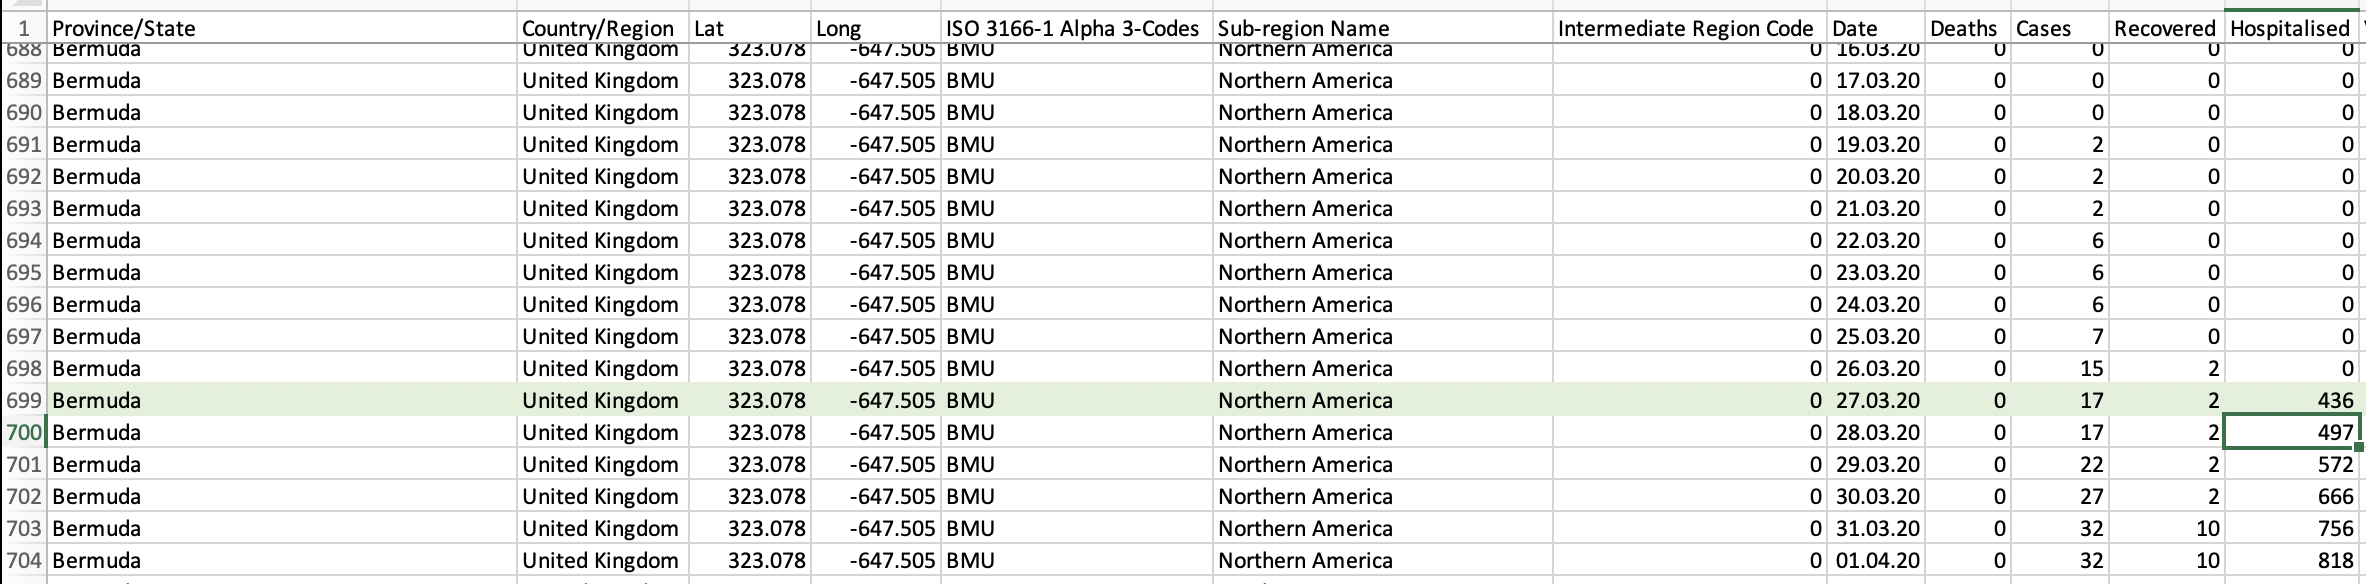

## Excel sense check observations

It appears that there are missing values in some columns (while the numbers of hospitalisations were input, it seems that the numbers of cases for example were not).

# 7. Population numbers

Let's look at population numbers to shed some additional light on the data set. I will now scrape data from a source with a stellar reputation - [Worldometers](https://www.worldometers.info/coronavirus/) - focusing on COVID-19 data.

In [14]:
# Import the necessary packages
import requests
import pandas as pd
from bs4 import BeautifulSoup

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
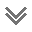

In [15]:
# Create a url variable
url = 'https://www.worldometers.info/coronavirus/'

# Create a requests variable
r = requests.get(url)

# Make contact with the website
if r.status_code == 200:
    html_doc = r.text
    
# Get a BeautifulSoup object
soup = BeautifulSoup(html_doc)

print(soup.prettify())

In [16]:
# Extract the contents of the table with the table id 
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

In [17]:
# Extract table headers
# Note: th = (table header), tr = (table row), and td = table column
rows = table.find_all('tr', attrs={'style': ""})

rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world">
 <td></td>
 <td style="text-align:left;">World</td>
 <td>558,882,728</td>
 <td

In [18]:
# Store the extracted data
output = []

column_names = ['#','Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
               'New Deaths', 'Total Recovered', 'New Recovered',
               'Active Cases', 'Serious, Critical', 'Tot Cases/ 1M pop',
               'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

# Create a for loop statement
for cases in rows:
    cases_data = cases.find_all('td')
    if cases_data:
        cases_text = [td.text for td in cases_data]
        output.append(dict(zip(column_names, cases_text)))

In [19]:
# Create a DataFrame
worldometer = pd.DataFrame(output)

worldometer.head()

# Country,Other  Total Cases New Cases Total Deaths New Deaths  \
0            World  558,882,728  +270,398    6,369,572       +464   
1  1           USA   90,065,165             1,045,080               
2  2         India   43,587,302               525,343               
3  3        Brazil   32,761,045               673,126               
4  4        France   31,974,607               149,943               

  Total Recovered New Recovered Active Cases Serious, Critical  \
0     532,318,362      +181,915   20,194,794            37,723   
1      85,624,982                  3,395,103             3,618   
2      42,937,876                    124,083               698   
3      31,094,805                    993,114             8,318   
4      29,929,515                  1,895,149               869   

  Tot Cases/ 1M pop Deaths/ 1M pop    Total Tests Tests/ 1M pop  \
0            71,699          817.2                                
1                                   1,055,315,901                 
2            30,973            373    865,723,159       615,178   
3           151,956          3,122     63,776,166       295,813   
4           487,687          2,287    271,490,188     4,140,858   

       Population  
0                  
1                  
2  1,407,273,210   
3    215,596,091   
4     65,563,751

In [20]:
#Extract population numbers
population=worldometer[['Country,Other', 'Population']]
population

Country,Other      Population
0           World                
1             USA                
2           India  1,407,273,210 
3          Brazil    215,596,091 
4          France     65,563,751 
..            ...             ...
222    Micronesia        117,446 
223          Niue          1,648 
224        Tuvalu         12,084 
225         China  1,439,323,776 
226        Total:                

[227 rows x 2 columns]

In [21]:
#Extract population numbers for UK and dependencies
uk_population = population[(population['Country,Other'] == 'Anguilla') | (population['Country,Other'] == 'Bermuda') | (population['Country,Other'] == 'British Virgin Islands') | (population['Country,Other'] == 'Cayman Islands') | (population['Country,Other'] == 'Channel Islands') | (population['Country,Other'] == 'Falkland Islands') | (population['Country,Other'] == 'Gibraltar') | (population['Country,Other'] == 'Isle of Man') | (population['Country,Other'] == 'Montserrat') | (population['Country,Other'] == 'Turks and Caicos') | (population['Country,Other'] == 'UK')]
uk_population

Country,Other   Population
6                        UK  68,602,673 
135         Channel Islands     177,084 
160             Isle of Man      85,937 
167          Cayman Islands      67,273 
175               Gibraltar      33,671 
182                 Bermuda      61,816 
205  British Virgin Islands      30,635 
208        Turks and Caicos      39,770 
214                Anguilla      15,272 
217        Falkland Islands       3,684 
218              Montserrat       4,998

## Initial observations population

Sense checking data provided by the UK government against population numbers confirms that the provided set is not reliable.

Just looking at all the vaccination numbers that span between 2 and 5 million, for small dependencies with only thousands of people living there would mean that people were vaccinated over and over again.

# 8. Problem-solving approach to data preparation for analysis

I will use a new approach to data preparation for analysis as introduced by David Loshin (President at Knowledge Integrity, Inc.) on the [SAS blog](https://www.sas.com/en_za/insights/articles/data-management/the-problem-solver-approach-to-data-preparation-for-analytics.html)

1. Clarify the questions you want to answer.
2. Identify the information necessary to answer the question.
3. Determine what information is available and what is not available.
4. Acquire the information that is not available.
5. Solve the problem.

## Clarify the question you want to answer

Questions that I am trying to answerfor the UK government to inform their marketing strategy, are as follows:

a. What are the total vaccinations (first dose, second dose, total and overtime) for a particular region
b. Where the first marketing campaign should be targeted based on:

	- area(s) with the largest number of people who have received a first dose but no second dose
	- area(s) with increasing numbers of deaths 
    - area(s) that have experienced a peak in hospitalisation numbers
    - area(s) with the greatest number of recoveries (avoid targetting the marketing campaign there)

## Identify the information necessary to answer the question

As proven above the data at hand is skewed and has missing values, so it would not provide an accurate answer to the UK government.

## Acquire the information that is not available

Thankfully there are organisations out there that understand how important accurate data is to fight COVID-19 pandemic together. [Our world in data](https://ourworldindata.org/covid-vaccinations) is one such organisation and I will include a data set that they are providing as an open source that is updated daily and of the highest quality into my analysis.

In [22]:
# Import CSV file
df = pd.read_csv('owid-covid-data.csv')

In [23]:
#Extract regions of interest from the data by ISO code
df2 = df[(df['iso_code']  == 'AIA') | (df['iso_code']  == 'BMU') | (df['iso_code']  == 'VGB') | (df['iso_code']  == 'CYM') | (df['iso_code']  == 'FLK') | (df['iso_code']  == 'GIB') | (df['iso_code']  == 'IMN') | (df['iso_code']  == 'MSR') | (df['iso_code']  == 'GBR') | (df['iso_code']  == 'GBR') | (df['iso_code']  == 'TCA')]
df2

iso_code      continent        location        date  total_cases  \
5101        AIA  North America        Anguilla  2020-03-28            2   
5102        AIA  North America        Anguilla  2020-03-29            2   
5103        AIA  North America        Anguilla  2020-03-30            2   
5104        AIA  North America        Anguilla  2020-03-31            2   
5105        AIA  North America        Anguilla  2020-04-01            2   
...         ...            ...             ...         ...          ...   
185606      GBR         Europe  United Kingdom  2022-06-22   22,636,418   
185607      GBR         Europe  United Kingdom  2022-06-23   22,654,687   
185608      GBR         Europe  United Kingdom  2022-06-24   22,671,160   
185609      GBR         Europe  United Kingdom  2022-06-25   22,671,160   
185610      GBR         Europe  United Kingdom  2022-06-26   22,671,160   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
5101            2                 NaN           NaN         NaN   
5102            0                 NaN           NaN         NaN   
5103            0                 NaN           NaN         NaN   
5104            0                 NaN           NaN         NaN   
5105            0                 NaN           NaN         NaN   
...           ...                 ...           ...         ...   
185606     33,137              15,892       179,961          77   
185607     18,269              16,711       180,037          76   
185608     16,473              17,342       180,105          68   
185609        NaN                 NaN       180,105         NaN   
185610        NaN                 NaN       180,105         NaN   

        new_deaths_smoothed  ...  female_smokers  male_smokers  \
5101                    NaN  ...             NaN           NaN   
5102                    NaN  ...             NaN           NaN   
5103                    NaN  ...             NaN           NaN   
5104                    NaN  ...             NaN           NaN   
5105                    NaN  ...             NaN           NaN   
...                     ...  ...             ...           ...   
185606                   53  ...              20            25   
185607                   56  ...              20            25   
185608                   56  ...              20            25   
185609                  NaN  ...              20            25   
185610                  NaN  ...              20            25   

        handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
5101                       NaN                         NaN               82   
5102                       NaN                         NaN               82   
5103                       NaN                         NaN               82   
5104                       NaN                         NaN               82   
5105                       NaN                         NaN               82   
...                        ...                         ...              ...   
185606                     NaN                           3               81   
185607                     NaN                           3               81   
185608                     NaN                           3               81   
185609                     NaN                           3               81   
185610                     NaN                           3               81   

        human_development_index  excess_mortality_cumulative_absolute  \
5101                        NaN                                   NaN   
5102                        NaN                                   NaN   
5103                        NaN                                   NaN   
5104                        NaN                                   NaN   
5105                        NaN                                   NaN   
...                         ...                                   ...   
185606                        1                 

In [24]:
df2.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [25]:
#Look at max values for each column
df3 = df2.groupby('location')[['total_cases', 'total_deaths', 'icu_patients', 'hosp_patients', 'people_vaccinated',
       'people_fully_vaccinated', 'total_vaccinations']] \
.agg(['max'])

df3

total_cases total_deaths icu_patients hosp_patients  \
                                 max          max          max           max   
location                                                                       
Anguilla                       3,411            9          NaN           NaN   
Bermuda                       15,957          138          NaN           NaN   
British Virgin Islands         6,941           63          NaN           NaN   
Cayman Islands                27,171           28          NaN           NaN   
Falkland Islands               1,807          NaN          NaN           NaN   
Gibraltar                     19,306          104          NaN           NaN   
Isle of Man                   33,821          108          NaN           NaN   
Montserrat                     1,016            8          NaN           NaN   
Turks and Caicos Islands       6,211           36          NaN           NaN   
United Kingdom            22,671,160      180,105        4,077        39,256   

                         people_vaccinated people_fully_vaccinated  \
                                       max                     max   
location                                                             
Anguilla                            10,813                  10,183   
Bermuda                             48,554                  47,657   
British Virgin Islands              19,389                  18,083   
Cayman Islands                      61,240                  59,442   
Falkland Islands                     2,632                   1,775   
Gibraltar                           42,074                  41,421   
Isle of Man                         69,560                  67,106   
Montserrat                           1,916                   1,829   
Turks and Caicos Islands            31,989                  29,963   
United Kingdom                  53,547,750              50,082,651   

                         total_vaccinations  
                                        max  
location                                     
Anguilla                             23,926  
Bermuda                             131,612  
British Virgin Islands               41,198  
Cayman Islands                      145,502  
Falkland Islands                      4,407  
Gibraltar                           119,855  
Isle of Man                         189,994  
Montserrat                            4,255  
Turks and Caicos Islands             69,803  
United Kingdom                  149,080,378

In [26]:
#Exclude UK from the data for more visibility in visualisations
df_nouk = df2[df2['location']  != 'United Kingdom']

In [27]:
#Check if UK was successfuly excluded
df_nouk['location'].value_counts()

Gibraltar                   845
Cayman Islands              836
Montserrat                  831
Bermuda                     830
Isle of Man                 829
Anguilla                    821
British Virgin Islands      821
Turks and Caicos Islands    821
Falkland Islands            814
Name: location, dtype: int64

In [28]:
#Calculate max values for non UK countries
df_nouk = df_nouk.groupby('location')[['total_cases', 'total_deaths', 'icu_patients', 'hosp_patients', 'people_vaccinated',
       'people_fully_vaccinated', 'total_vaccinations']] \
.agg(['max'])

<BarContainer object of 9 artists>

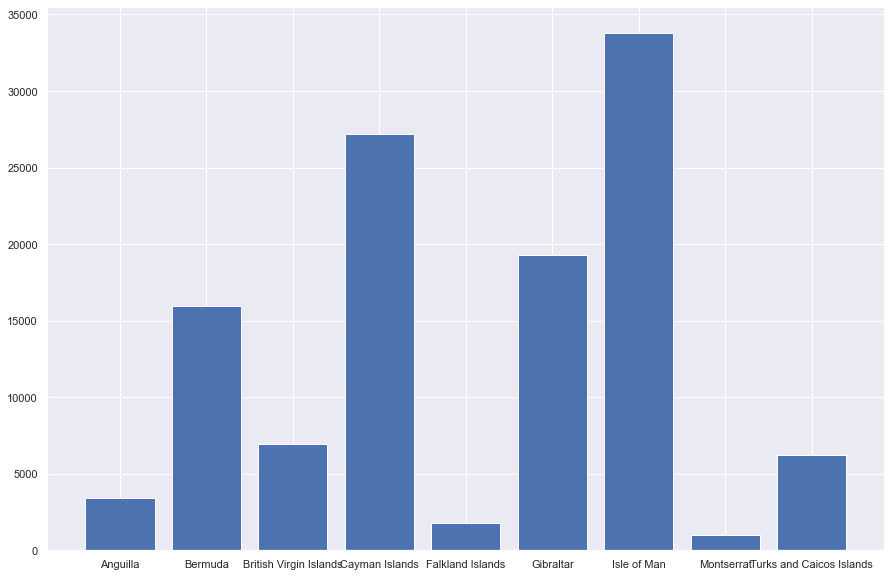

In [29]:
#Plot a barplot for total cases
plt.bar(x = df_nouk.index.values, height = df_nouk[('total_cases', 'max')])

<BarContainer object of 9 artists>

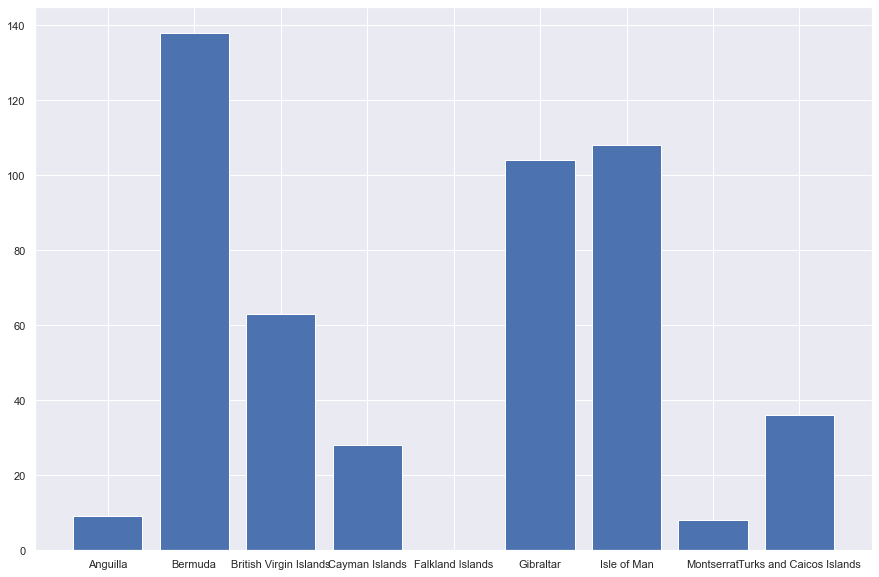

In [30]:
#Plot a barplot for total deaths
plt.bar(x = df_nouk.index.values, height = df_nouk[('total_deaths', 'max')])

## Adding calculated fields for relative deaths per country

In order to be able to make conslusions we need to add calculated fields to better compare the data.

In [31]:
#Extract totals for cases and hospitalisations
df4=worldometer[['Country,Other', 'Population', 'Total Cases', 'Total Deaths', 'Total Recovered']]
df4

Country,Other      Population  Total Cases Total Deaths Total Recovered
0           World                  558,882,728    6,369,572     532,318,362
1             USA                   90,065,165   1,045,080       85,624,982
2           India  1,407,273,210    43,587,302     525,343       42,937,876
3          Brazil    215,596,091    32,761,045     673,126       31,094,805
4          France     65,563,751    31,974,607     149,943       29,929,515
..            ...             ...          ...          ...             ...
222    Micronesia        117,446            38                           33
223          Niue          1,648            23                           15
224        Tuvalu         12,084             3                             
225         China  1,439,323,776       226,397       5,226          220,301
226        Total:                  558,882,728    6,369,572     532,318,362

[227 rows x 5 columns]

In [32]:
#Extract regions of interest from the data set by ISO code
df5 = df4[(population['Country,Other'] == 'Anguilla') | (population['Country,Other'] == 'Bermuda') | (population['Country,Other'] == 'British Virgin Islands') | (population['Country,Other'] == 'Cayman Islands') | (population['Country,Other'] == 'Channel Islands') | (population['Country,Other'] == 'Falkland Islands') | (population['Country,Other'] == 'Gibraltar') | (population['Country,Other'] == 'Isle of Man') | (population['Country,Other'] == 'Montserrat') | (population['Country,Other'] == 'Turks and Caicos') | (population['Country,Other'] == 'UK')]
df5

Country,Other   Population Total Cases Total Deaths  \
6                        UK  68,602,673   22,883,995     180,718    
135         Channel Islands     177,084       83,571         180    
160             Isle of Man      85,937       36,998         110    
167          Cayman Islands      67,273       27,594          29    
175               Gibraltar      33,671       19,796         105    
182                 Bermuda      61,816       16,401         140    
205  British Virgin Islands      30,635        7,107          63    
208        Turks and Caicos      39,770        6,234          36    
214                Anguilla      15,272        3,476           9    
217        Falkland Islands       3,684        1,831                
218              Montserrat       4,998        1,022           8    

    Total Recovered  
6        22,226,563  
135          80,325  
160          26,794  
167           8,553  
175          16,579  
182          16,003  
205             N/A  
208           6,141  
214           3,446  
217             N/A  
218           1,009

In [33]:
# Remove Falkland Islands from the data set as it has null value for deaths
df6 = df4[(population['Country,Other'] == 'Anguilla') | (population['Country,Other'] == 'Bermuda') | (population['Country,Other'] == 'British Virgin Islands') | (population['Country,Other'] == 'Cayman Islands') | (population['Country,Other'] == 'Channel Islands') | (population['Country,Other'] == 'Gibraltar') | (population['Country,Other'] == 'Isle of Man') | (population['Country,Other'] == 'Montserrat') | (population['Country,Other'] == 'Turks and Caicos') | (population['Country,Other'] == 'UK')]
df6

Country,Other   Population Total Cases Total Deaths  \
6                        UK  68,602,673   22,883,995     180,718    
135         Channel Islands     177,084       83,571         180    
160             Isle of Man      85,937       36,998         110    
167          Cayman Islands      67,273       27,594          29    
175               Gibraltar      33,671       19,796         105    
182                 Bermuda      61,816       16,401         140    
205  British Virgin Islands      30,635        7,107          63    
208        Turks and Caicos      39,770        6,234          36    
214                Anguilla      15,272        3,476           9    
218              Montserrat       4,998        1,022           8    

    Total Recovered  
6        22,226,563  
135          80,325  
160          26,794  
167           8,553  
175          16,579  
182          16,003  
205             N/A  
208           6,141  
214           3,446  
218           1,009

In [34]:
# Print data types
df6.dtypes

Country,Other      object
Population         object
Total Cases        object
Total Deaths       object
Total Recovered    object
dtype: object

In [35]:
# Remove comma from the total deaths values to change object to int
df6['Total Deaths'] = df6['Total Deaths'].apply(lambda x:x.replace(",", ""))

/var/folders/_j/mt66jnbx3rz8p5zqwc339b400000gp/T/ipykernel_15365/3941327545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Total Deaths'] = df6['Total Deaths'].apply(lambda x:x.replace(",", ""))


In [36]:
# Print to check if comma is removed
df6

Country,Other   Population Total Cases Total Deaths  \
6                        UK  68,602,673   22,883,995      180718    
135         Channel Islands     177,084       83,571         180    
160             Isle of Man      85,937       36,998         110    
167          Cayman Islands      67,273       27,594          29    
175               Gibraltar      33,671       19,796         105    
182                 Bermuda      61,816       16,401         140    
205  British Virgin Islands      30,635        7,107          63    
208        Turks and Caicos      39,770        6,234          36    
214                Anguilla      15,272        3,476           9    
218              Montserrat       4,998        1,022           8    

    Total Recovered  
6        22,226,563  
135          80,325  
160          26,794  
167           8,553  
175          16,579  
182          16,003  
205             N/A  
208           6,141  
214           3,446  
218           1,009

In [37]:
# Change object to integer for total deaths
df6['Total Deaths'] = df6['Total Deaths'].astype(int)

#Check if the conversion was succesfful
df6.dtypes

/var/folders/_j/mt66jnbx3rz8p5zqwc339b400000gp/T/ipykernel_15365/1901642877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Total Deaths'] = df6['Total Deaths'].astype(int)


Country,Other      object
Population         object
Total Cases        object
Total Deaths        int64
Total Recovered    object
dtype: object

In [38]:
# Print to check if comma is removed
df6

Country,Other   Population Total Cases  Total Deaths  \
6                        UK  68,602,673   22,883,995        180718   
135         Channel Islands     177,084       83,571           180   
160             Isle of Man      85,937       36,998           110   
167          Cayman Islands      67,273       27,594            29   
175               Gibraltar      33,671       19,796           105   
182                 Bermuda      61,816       16,401           140   
205  British Virgin Islands      30,635        7,107            63   
208        Turks and Caicos      39,770        6,234            36   
214                Anguilla      15,272        3,476             9   
218              Montserrat       4,998        1,022             8   

    Total Recovered  
6        22,226,563  
135          80,325  
160          26,794  
167           8,553  
175          16,579  
182          16,003  
205             N/A  
208           6,141  
214           3,446  
218           1,009

In [39]:
# Remove comma from the population values to change object to int

df6['Population'] = df6['Population'].apply(lambda x:x.replace(",", ""))

/var/folders/_j/mt66jnbx3rz8p5zqwc339b400000gp/T/ipykernel_15365/3645759946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Population'] = df6['Population'].apply(lambda x:x.replace(",", ""))


In [40]:
# Change object to integer for population
df6['Population'] = df6['Population'].astype(int)

/var/folders/_j/mt66jnbx3rz8p5zqwc339b400000gp/T/ipykernel_15365/3811613392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Population'] = df6['Population'].astype(int)


In [41]:
df6.dtypes

Country,Other      object
Population          int64
Total Cases        object
Total Deaths        int64
Total Recovered    object
dtype: object

In [42]:
#Add a calculated field of deaths per 100.000 population
df6['Deaths per 10000'] = df6['Total Deaths'] / df6['Population'] * 100000

/var/folders/_j/mt66jnbx3rz8p5zqwc339b400000gp/T/ipykernel_15365/634703584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Deaths per 10000'] = df6['Total Deaths'] / df6['Population'] * 100000


In [43]:
df6

Country,Other  Population Total Cases  Total Deaths  \
6                        UK    68602673  22,883,995        180718   
135         Channel Islands      177084      83,571           180   
160             Isle of Man       85937      36,998           110   
167          Cayman Islands       67273      27,594            29   
175               Gibraltar       33671      19,796           105   
182                 Bermuda       61816      16,401           140   
205  British Virgin Islands       30635       7,107            63   
208        Turks and Caicos       39770       6,234            36   
214                Anguilla       15272       3,476             9   
218              Montserrat        4998       1,022             8   

    Total Recovered  Deaths per 10000  
6        22,226,563               263  
135          80,325               102  
160          26,794               128  
167           8,553                43  
175          16,579               312  
182          16,003               226  
205             N/A               206  
208           6,141                91  
214           3,446                59  
218           1,009               160

<BarContainer object of 10 artists>

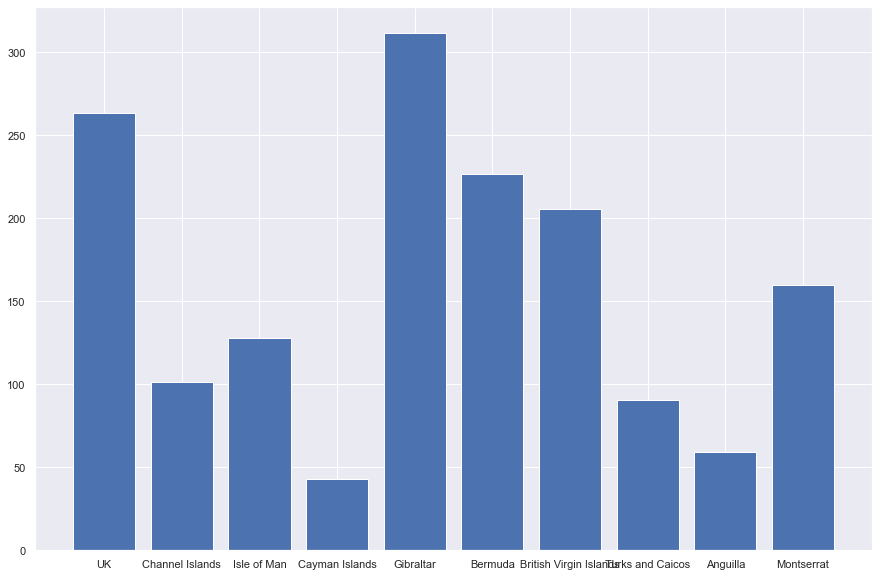

In [44]:
#Plot a barplot with relative death numbers
plt.bar(x = df6['Country,Other'], height = df6['Deaths per 10000'])

## Adding calculated fields for ratios of people vaccinated and fully vaccinated

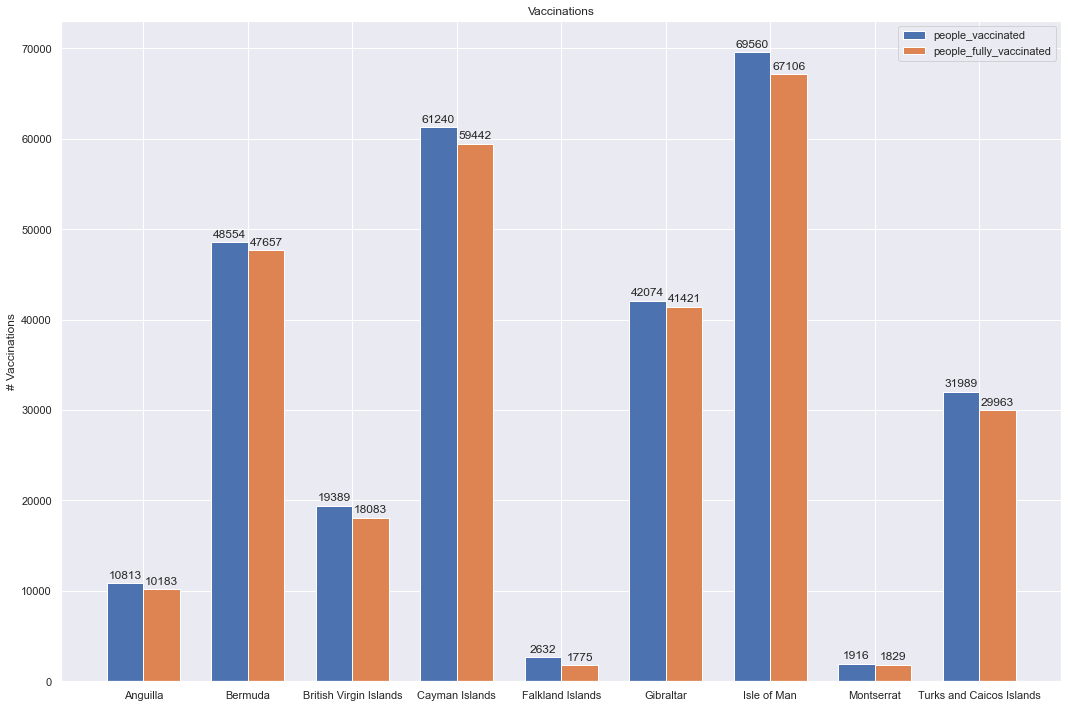

In [45]:
#Compare numbers of people vaccinated and fully vaccinated
labels = df_nouk.index.values
x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_nouk[("people_vaccinated", "max")], width, label="people_vaccinated")
rects2 = ax.bar(x + width/2, df_nouk[("people_fully_vaccinated", "max")], width, label="people_fully_vaccinated")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# Vaccinations')
ax.set_title('Vaccinations')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [46]:
#Look at max values for each column
dfx = df2.groupby("location")[["population", "people_vaccinated", "people_fully_vaccinated"]] \
.agg(["max"])

dfx

population people_vaccinated people_fully_vaccinated
                                max               max                     max
location                                                                     
Anguilla                     15,125            10,813                  10,183
Bermuda                      62,092            48,554                  47,657
British Virgin Islands       30,423            19,389                  18,083
Cayman Islands               66,498            61,240                  59,442
Falkland Islands              3,528             2,632                   1,775
Gibraltar                    33,691            42,074                  41,421
Isle of Man                  85,410            69,560                  67,106
Montserrat                    4,981             1,916                   1,829
Turks and Caicos Islands     39,226            31,989                  29,963
United Kingdom           68,207,114        53,547,750              50,082,651

In [47]:
dfx.dtypes

population               max    float64
people_vaccinated        max    float64
people_fully_vaccinated  max    float64
dtype: object

In [48]:
# Calculate % of people with first dose
dfx['First Vaccine percentage'] = dfx[('people_vaccinated', 'max')] / dfx[('population', 'max')] * 100

In [49]:
dfx

population people_vaccinated people_fully_vaccinated  \
                                max               max                     max   
location                                                                        
Anguilla                     15,125            10,813                  10,183   
Bermuda                      62,092            48,554                  47,657   
British Virgin Islands       30,423            19,389                  18,083   
Cayman Islands               66,498            61,240                  59,442   
Falkland Islands              3,528             2,632                   1,775   
Gibraltar                    33,691            42,074                  41,421   
Isle of Man                  85,410            69,560                  67,106   
Montserrat                    4,981             1,916                   1,829   
Turks and Caicos Islands     39,226            31,989                  29,963   
United Kingdom           68,207,114        53,547,750              50,082,651   

                         First Vaccine percentage  
                                                   
location                                           
Anguilla                                       71  
Bermuda                                        78  
British Virgin Islands                         64  
Cayman Islands                                 92  
Falkland Islands                               75  
Gibraltar                                     125  
Isle of Man                                    81  
Montserrat                                     38  
Turks and Caicos Islands                       82  
United Kingdom                                 79

In [50]:
#Calculate % of people fully vaccinated
dfx['Second Vaccine percentage'] = dfx[('people_fully_vaccinated', 'max')] / dfx[('population', 'max')] * 100

In [51]:
dfx

population people_vaccinated people_fully_vaccinated  \
                                max               max                     max   
location                                                                        
Anguilla                     15,125            10,813                  10,183   
Bermuda                      62,092            48,554                  47,657   
British Virgin Islands       30,423            19,389                  18,083   
Cayman Islands               66,498            61,240                  59,442   
Falkland Islands              3,528             2,632                   1,775   
Gibraltar                    33,691            42,074                  41,421   
Isle of Man                  85,410            69,560                  67,106   
Montserrat                    4,981             1,916                   1,829   
Turks and Caicos Islands     39,226            31,989                  29,963   
United Kingdom           68,207,114        53,547,750              50,082,651   

                         First Vaccine percentage Second Vaccine percentage  
                                                                             
location                                                                     
Anguilla                                       71                        67  
Bermuda                                        78                        77  
British Virgin Islands                         64                        59  
Cayman Islands                                 92                        89  
Falkland Islands                               75                        50  
Gibraltar                                     125                       123  
Isle of Man                                    81                        79  
Montserrat                                     38                        37  
Turks and Caicos Islands                       82                        76  
United Kingdom                                 79                        73

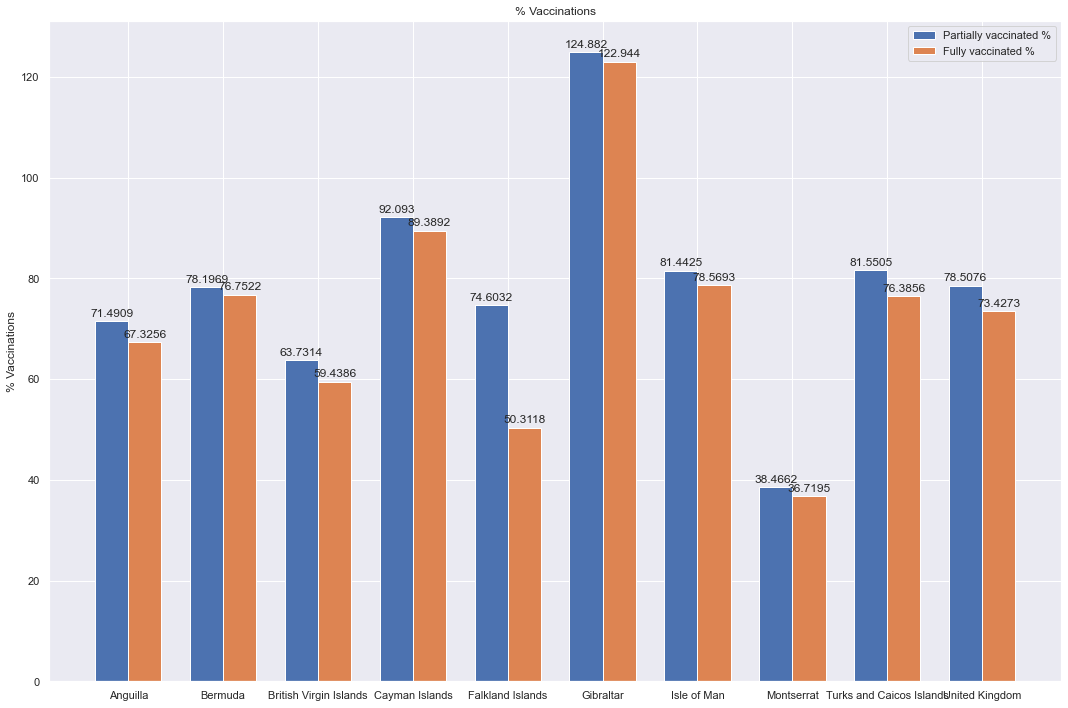

In [52]:
#Compare % of people vaccinated and fully vaccinated
labels = dfx.index.values
x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, dfx["First Vaccine percentage"], width, label="Partially vaccinated %")
rects2 = ax.bar(x + width/2, dfx["Second Vaccine percentage"], width, label="Fully vaccinated %")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Vaccinations')
ax.set_title('% Vaccinations')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## Looking at a movie average for 7 days of hospitalisations

In [53]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [54]:
sample = df2[['location','date','hosp_patients']]

In [55]:
sample

location        date  hosp_patients
5101          Anguilla  2020-03-28            NaN
5102          Anguilla  2020-03-29            NaN
5103          Anguilla  2020-03-30            NaN
5104          Anguilla  2020-03-31            NaN
5105          Anguilla  2020-04-01            NaN
...                ...         ...            ...
185606  United Kingdom  2022-06-22            NaN
185607  United Kingdom  2022-06-23            NaN
185608  United Kingdom  2022-06-24            NaN
185609  United Kingdom  2022-06-25            NaN
185610  United Kingdom  2022-06-26            NaN

[8326 rows x 3 columns]

In [56]:
# Select data for a specific province
sample_uk = sample[sample['location'] == 'United Kingdom']

In [57]:
sample_uk

location        date  hosp_patients
184733  United Kingdom  2020-01-31            NaN
184734  United Kingdom  2020-02-01            NaN
184735  United Kingdom  2020-02-02            NaN
184736  United Kingdom  2020-02-03            NaN
184737  United Kingdom  2020-02-04            NaN
...                ...         ...            ...
185606  United Kingdom  2022-06-22            NaN
185607  United Kingdom  2022-06-23            NaN
185608  United Kingdom  2022-06-24            NaN
185609  United Kingdom  2022-06-25            NaN
185610  United Kingdom  2022-06-26            NaN

[878 rows x 3 columns]

In [58]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [59]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

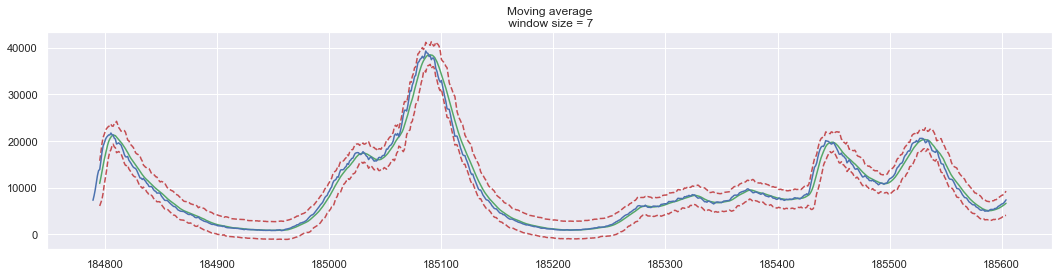

In [60]:
# 7 days moving average
plot_moving_average(sample_uk.hosp_patients, 7, plot_intervals=True)

## Analysing Tweets for keywords

In [61]:
pd.options.display.max_colwidth = 200
sns.set(rc = {'figure.figsize':(15,10)})

In [62]:
tweets = pd.read_csv('tweets.csv')

In [63]:
tweets.head()

created_at                        id                    id_str  \
0  23/05/2022 1,528,750,000,000,000,000 1,528,750,000,000,000,000   
1  23/05/2022 1,528,720,000,000,000,000 1,528,720,000,000,000,000   
2  23/05/2022 1,528,650,000,000,000,000 1,528,650,000,000,000,000   
3  23/05/2022 1,528,610,000,000,000,000 1,528,610,000,000,000,000   
4  23/05/2022 1,528,600,000,000,000,000 1,528,600,000,000,000,000   

                                                                                                                                                                                                      text  \
0  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
1                                                                                             #COVID19 is linked to more #diabetes diagnoses in kids, CDC study finds https://t.co/H5lO1W7Skd via @YouTube   
2  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
3  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
4  Advanced healthcare at your fingertips\nhttps://t.co/aUQ93qFsJ4 | +443333053358\n#slough #sloughtownfc #sloughtown #sloughi #windsor #windsorcastle #diabetes #physician #generalphysician\n#hospita...   

  truncated  \
0     False   
1     False   
2     False   
3     False   
4     False   

                                                                                source  \
0        <a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>   
1   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2        <a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>   
3        <a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>   
4  <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>   

   in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                    NaN                        NaN                  NaN   
1                    NaN                        NaN                  NaN   
2                    NaN                        NaN                  NaN   
3                    NaN                        NaN                  NaN   
4                    NaN                        NaN                  NaN   

   in_reply_to_user_id_str  ...  contributors  is_quote_status retweet_count  \
0                      NaN  ...           NaN            False             0   
1                      NaN  ...           NaN            False             0   
2                      NaN  ...           NaN            False             0   
3                      NaN  ...           NaN            False             0   
4                      NaN  ...           NaN            False             0   

   favorite_count  favorited retweeted lang possibly_sensitive  \
0               0      False     False   en              False   
1               1      False     False   en              False   
2               0      False     False   en              False   
3               0      False     False   en              False   
4               0      False     False   en              False   

  quoted_status_id  quoted_status_id_str  
0              NaN                   NaN  
1              NaN                   NaN  
2              NaN                   NaN  
3              NaN                   NaN  
4              NaN                   NaN  

[5 rows x 21 columns]

In [64]:
# Create a new dataframe containing text only
tweets['text'] = tweets['text'].astype(str)
tweets_text = tweets['text'].apply(lambda x: x if x.strip() != None else None)

In [65]:
# Loop through the messages and create a list containing hashtags
tags = []
for y in [x.split(' ') for x in tweets_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z)

# Create a Series containing the value counts in our list
tags=pd.Series(tags).value_counts()

In [66]:
# Display the first 30 records
tags.head(30)

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Shanghai                 63
#Covid_19                 63
#datavisualization        63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

In [67]:
# Convert the series into a dataframe
data = pd.DataFrame(tags).reset_index()
#Rename the columns
data.columns = ['word', 'count']
# Fix count datatype
data ['count'] = data ['count'].astype(int)
data

word  count
0                       #COVID19   1632
1                #CovidIsNotOver    472
2                         #China    262
3                       #covid19    176
4                       #Covid19    148
...                          ...    ...
4771  hospital.\n#CovidIsNotOver      1
4772           #OmicronIsNotMild      1
4773                 #Covid19NSW      1
4774                   #CovidNSW      1
4775      total.\n\n#coronavirus      1

[4776 rows x 2 columns]

In [68]:
#Display the most used hashtags
display(data.loc[(data['count']>100)])

word  count
0         #COVID19   1632
1  #CovidIsNotOver    472
2           #China    262
3         #covid19    176
4         #Covid19    148
5           #COVID    108
6           #covid    104
7          #Greece    103

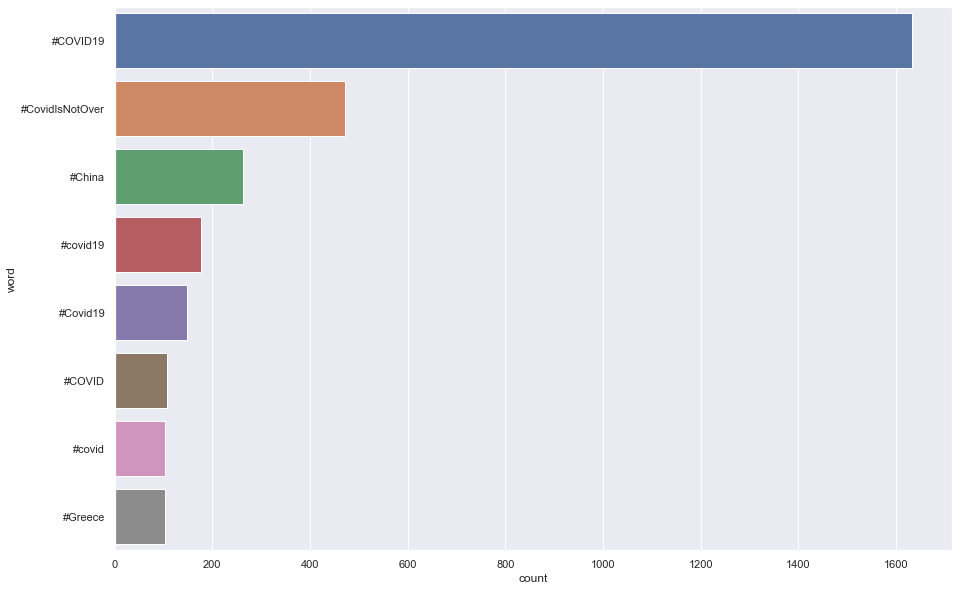

In [69]:
ax = sns.barplot(x='count',y='word', data=data.loc[(data['count']>100)])